In [1]:
import etl

import pymc as pm
import arviz as az
import pandas as pd

import constants as c
import model as mod
import os

from importlib import reload
reload(etl)

<module 'etl' from '/Users/ben/Desktop/Code/kaggle-mm-2025/etl.py'>

In [2]:
df = etl.read_league_season_results(league="M", season=2019)
clean_df, team_ids = etl.preprocess_match_data(raw_data=df)
data_dict, coords = etl.get_data_dict_and_coords(processed_data=clean_df, team_ids=team_ids)

## PyMC model testing

In [3]:
game_model = mod.build_model(data_dict=data_dict, coords=coords)
idata = mod.sample_model(model=game_model)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta_off, eta_def, theta_off, theta_def, league_eff, league_hfa, sigma_eff, rho_pace, team_pace, league_pace, sigma_poss]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 93 seconds.


#### Traceplots

array([[<Axes: title={'center': 'league_hfa'}>,
        <Axes: title={'center': 'league_hfa'}>],
       [<Axes: title={'center': 'league_eff'}>,
        <Axes: title={'center': 'league_eff'}>],
       [<Axes: title={'center': 'league_pace'}>,
        <Axes: title={'center': 'league_pace'}>]], dtype=object)

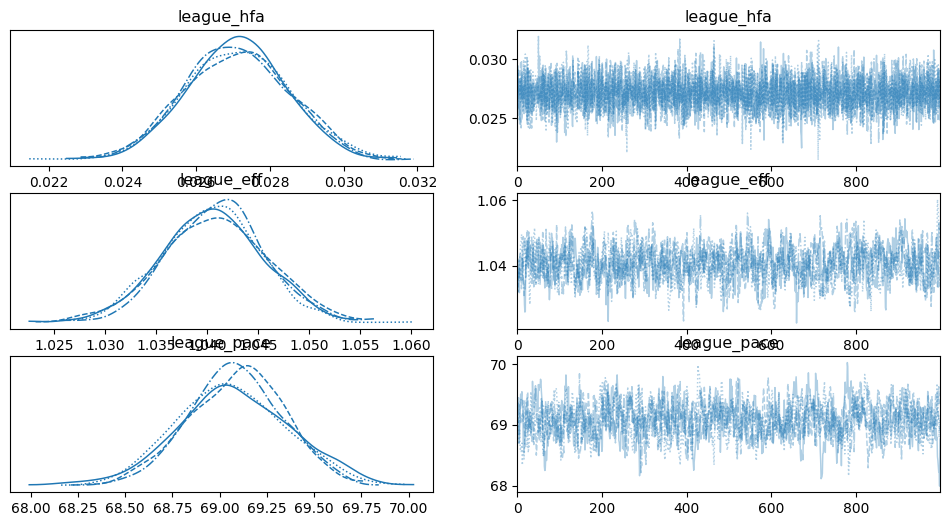

In [4]:
az.plot_trace(idata, var_names=['league_hfa', 'league_eff', 'league_pace'])

array([[<Axes: title={'center': 'eta_off'}>,
        <Axes: title={'center': 'eta_off'}>],
       [<Axes: title={'center': 'eta_def'}>,
        <Axes: title={'center': 'eta_def'}>],
       [<Axes: title={'center': 'sigma_poss'}>,
        <Axes: title={'center': 'sigma_poss'}>],
       [<Axes: title={'center': 'rho_pace'}>,
        <Axes: title={'center': 'rho_pace'}>],
       [<Axes: title={'center': 'sigma_eff'}>,
        <Axes: title={'center': 'sigma_eff'}>]], dtype=object)

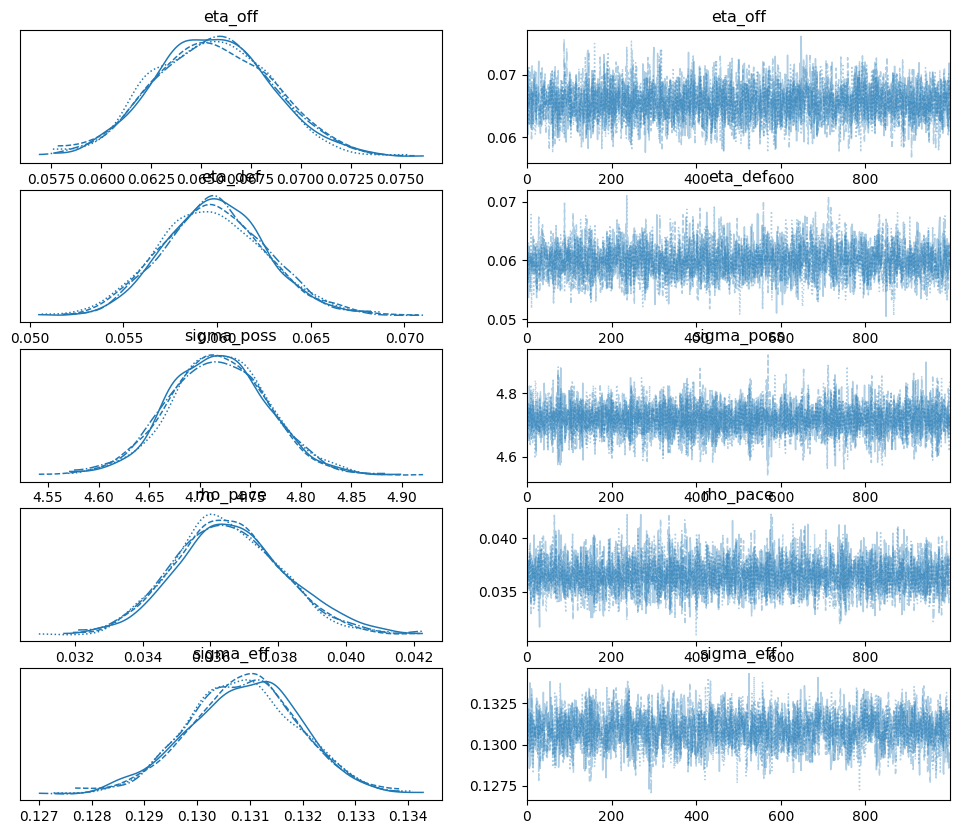

In [5]:
az.plot_trace(idata, var_names=["eta_off", "eta_def", "sigma_poss", "rho_pace", "sigma_eff"])

#### Team ratings

In [8]:
team_ratings = etl.extract_team_ratings_from_trace(trace=idata, league="M")

In [9]:
team_ratings.head()

,team_id,team_name,net_rating,off_rating,def_rating
24,1211,Gonzaga,0.325,0.195,0.130
89,1438,Virginia,0.318,0.170,0.148
17,1181,Duke,0.284,0.143,0.141
191,1277,Michigan St,0.263,0.150,0.113
199,1314,North Carolina,0.237,0.130,0.107
